In [1]:
import pandas as pd
import functions 
import numpy as np

import yaml

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('../data/raw/Starbucks_satisfactory_survey.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import os
print(os.getcwd())

/Users/barbaracastelo/Desktop/Project1/notebooks


# Cleaning Data

In [5]:
df

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,10. What do you most frequently purchase at Starbucks?,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,Cold drinks,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,Coffee,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee;Cold drinks,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,Cold drinks,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,Coffee,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


In [6]:
new_column_names = {'1. Your Gender': 'gender', '2. Your Age': 'age', 
                   '3. Are you currently....?': 'occupation', '4. What is your annual income?': 'income', 
                   '5. How often do you visit Starbucks?': 'visits', 
                   '6. How do you usually enjoy Starbucks?': 'meal_type', 
                   '7. How much time do you normally  spend during your visit?': 'time_spent', 
                   "8. The nearest Starbucks's outlet to you is...?": 'distance', 
                   '9. Do you have Starbucks membership card?': 'member', 
                   '10. What do you most frequently purchase at Starbucks?': 'purchase', 
                   '11. On average, how much would you spend at Starbucks per visit?': 'money_spent', 
                   '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:': 'quality_rating', 
                   '13. How would you rate the price range at Starbucks?': 'price_rating', 
                   '14. How important are sales and promotions in your purchase decision?': 'sales/promotions_importance', 
                   '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)': 'ambiance_rating', 
                   '16. You rate the WiFi quality at Starbucks as..': 'wifi_quality', 
                   '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)': 'service_rating', 
                   '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?': 'starbucks_for_business_meetings/hangouts', 
                   '19. How do you come to hear of promotions at Starbucks? Check all that apply.': 'promotions_source', 
                   '20. Will you continue buying at Starbucks?': 'will_return'}



In [7]:
df.rename(columns=new_column_names, inplace=True)

In [8]:
df = df.astype(str)

for column in df.columns:
    df[column] = df[column].str.replace(' ', '_').str.lower()


In [9]:
df = df.drop('Timestamp', axis=1)

In [10]:
df = df.drop('income', axis=1)

In [11]:
df = df.drop('money_spent', axis=1)

In [12]:
df.columns

Index(['gender', 'age', 'occupation', 'visits', 'meal_type', 'time_spent',
       'distance', 'member', 'purchase', 'quality_rating', 'price_rating',
       'sales/promotions_importance', 'ambiance_rating', 'wifi_quality',
       'service_rating', 'starbucks_for_business_meetings/hangouts',
       'promotions_source', 'will_return'],
      dtype='object')

In [13]:
num_rows, num_columns = df.shape

print(df.shape)

(122, 18)


In [14]:
# meter na parte do cleaning 
df = df[~df.apply(lambda row: row.astype(str).str.contains('never', case=False).any(), axis=1)]

In [15]:
num_rows, num_columns = df.shape

print(df.shape)

(113, 18)


In [16]:
df

,gender,age,occupation,visits,meal_type,time_spent,distance,member,purchase,quality_rating,price_rating,sales/promotions_importance,ambiance_rating,wifi_quality,service_rating,starbucks_for_business_meetings/hangouts,promotions_source,will_return
0,female,from_20_to_29,student,rarely,dine_in,between_30_minutes_to_1_hour,within_1km,yes,coffee,4,3,5,5,4,4,3,starbucks_website/apps;social_media;emails;dea...,yes
1,female,from_20_to_29,student,rarely,take_away,below_30_minutes,1km_-_3km,yes,cold_drinks;pastries,4,3,4,4,4,5,2,social_media;in_store_displays,yes
2,male,from_20_to_29,employed,monthly,dine_in,between_30_minutes_to_1_hour,more_than_3km,yes,coffee,4,3,4,4,4,4,3,in_store_displays;billboards,yes
3,female,from_20_to_29,student,rarely,take_away,below_30_minutes,more_than_3km,no,coffee,2,1,4,3,3,3,3,through_friends_and_word_of_mouth,no
4,male,from_20_to_29,student,monthly,take_away,between_30_minutes_to_1_hour,1km_-_3km,no,coffee;sandwiches,3,3,4,2,2,3,3,starbucks_website/apps;social_media,yes
5,female,from_20_to_29,student,rarely,dine_in,between_30_minutes_to_1_hour,more_than_3km,no,cold_drinks,4,3,5,5,4,5,4,social_media,yes
6,female,from_20_to_29,student,rarely,dine_in,below_30_minutes,within_1km,yes,coffee,5,5,5,5,3,5,5,starbucks_website/apps;social_media,yes
7,male,from_20_to_29,employed,rarely,dine_in,between_30_minutes_to_1_hour,more_than_3km,yes,coffee;cold_drinks,4,2,3,3,3,3,3,starbucks_website/apps;social_media;emails;thr...,yes
8,female,from_20_to_29,student,rarely,drive-thru,below_30_minutes,more_than_3km,yes,cold_drinks,5,4,4,4,4,4,4,starbucks_website/apps;social_media;through_fr...,yes
9,male,from_20_to_29,employed,monthly,take_away,below_30_minutes,more_than_3km,no,coffee,4,3,3,4,3,3,4,social_media;through_friends_and_word_of_mouth,yes


In [17]:
df.to_csv('starbucks.csv', index=False)

## Purchase

#### Here i wanted to see the bought items and their respective percentages 

In [18]:
df['purchase'].value_counts()

purchase
coffee                                           62
cold_drinks                                      24
coffee;cold_drinks                                6
coffee;pastries                                   6
coffee;sandwiches                                 3
cold_drinks;juices;pastries                       2
pastries                                          2
coffee;juices;pastries;sandwiches                 1
cold_drinks;pastries;sandwiches                   1
cold_drinks;pastries                              1
coffee;pastries;sandwiches                        1
coffee;cold_drinks;pastries;sandwiches            1
jaws_chip_                                        1
cake_                                             1
coffee;cold_drinks;juices;pastries;sandwiches     1
Name: count, dtype: int64

In [19]:
from collections import defaultdict

def aggregate_purchase_data(data, category_mapping):
    aggregated_purchase = defaultdict(int)
    for purchase, count in data.items():
        categories = purchase.split(';')
        for category in categories:
            category = category.strip('_')

            mapped_category = category_mapping.get(category, category)
            aggregated_purchase[mapped_category] += count
    return aggregated_purchase

purchase_counts = df['purchase'].value_counts().to_dict()

category_mapping = {
    "coffee": "coffee",
    "cold_drinks": "cold drinks",
    "pastries": "pastries",
    "sandwiches": "sandwiches",
    "juices": "others",
    "cake": "others",
    "jaws_chip": "others",
}

aggregated_purchase = aggregate_purchase_data(purchase_counts, category_mapping)
print(aggregated_purchase)


defaultdict(<class 'int'>, {'coffee': 81, 'cold drinks': 36, 'pastries': 16, 'sandwiches': 8, 'others': 6})


In [20]:
def calculate_percentages(aggregated_purchase):
    total_count = sum(aggregated_purchase.values())
    percentages = {category: (count / total_count) * 100 for category, count in aggregated_purchase.items()}
    return percentages


percentages = calculate_percentages(aggregated_purchase)
print(percentages)


{'coffee': 55.10204081632652, 'cold drinks': 24.489795918367346, 'pastries': 10.884353741496598, 'sandwiches': 5.442176870748299, 'others': 4.081632653061225}


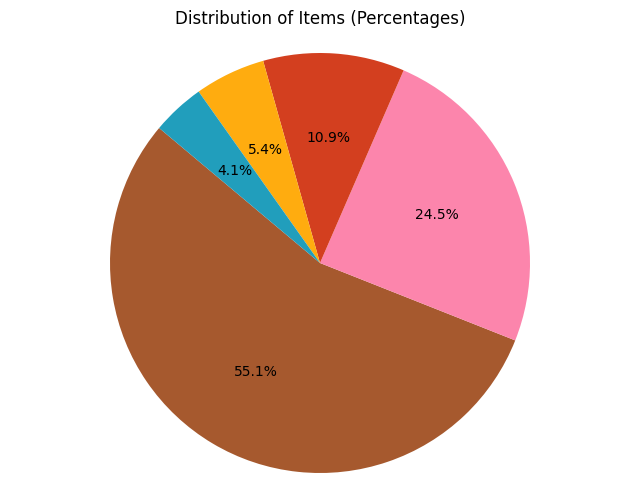

In [21]:
aggregated_purchase = {
    'coffee': 81, 
    'cold drinks': 36, 
    'pastries': 16, 
    'sandwiches': 8, 
    'others': 6
}

total_count = sum(aggregated_purchase.values())
percentages = [(count / total_count) * 100 for count in aggregated_purchase.values()]

colors = ['#A6592E', '#FC85AC', '#D33F1F', '#FFAC0F', '#219EBC']

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Items (Percentages)')
plt.axis('equal') 
plt.show()



## Clients by age

#### The demoraphic target:

In [22]:
df['age'].value_counts()

age
from_20_to_29    79
from_30_to_39    17
below_20         10
40_and_above      7
Name: count, dtype: int64

In [23]:
age_counts = {
    "from_20_to_29": 79,
    "from_30_to_39": 17,
    "below_20": 10,
    "40_and_above": 7
}


def calculate_age_percentages(age_counts):
    total_count = sum(age_counts.values())
    percentages = {age_group: (count / total_count) * 100 for age_group, count in age_counts.items()}
    return percentages

def print_age_percentages(percentages):
    for age_group, percentage in percentages.items():
        print(f"{age_group}: {percentage:.2f}%")


percentages = calculate_age_percentages(age_counts)
print_age_percentages(percentages)


from_20_to_29: 69.91%
from_30_to_39: 15.04%
below_20: 8.85%
40_and_above: 6.19%


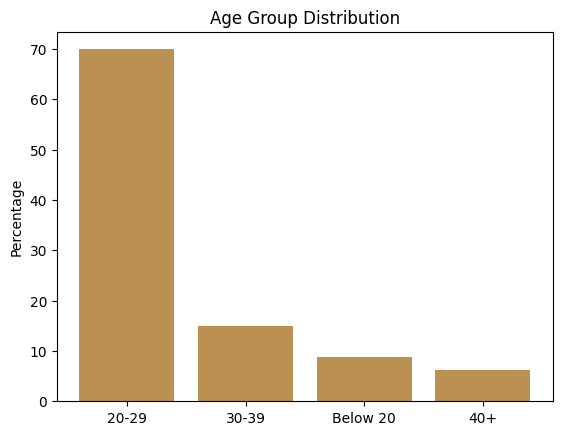

In [24]:
labels = ["20-29", "30-39", "Below 20", "40+"]
sizes = list(percentages.values())

fig3, ax3 = plt.subplots()
ax3.bar(labels, sizes, color='#BA9151')

ax3.set_ylabel('Percentage')
ax3.set_title('Age Group Distribution')

plt.show()


## Service Preference

In [25]:
df['meal_type'].value_counts()

meal_type
take_away             48
dine_in               44
drive-thru            20
i_dont_like_coffee     1
Name: count, dtype: int64

In [26]:
def filter_sales_data(meal_type):
    filtered_data = {key: value for key, value in sales_data.items() if key != 'i_dont_like_coffee'}
    return filtered_data


sales_data = {
    'take_away': 48,
    'dine_in': 44,
    'drive-thru': 20,
    'i_dont_like_coffee': 1
}


filtered_data = filter_sales_data(sales_data)
print(filtered_data)



{'take_away': 48, 'dine_in': 44, 'drive-thru': 20}


In [28]:
def calculate_sales(sales_data):
    total_sales = sum(sales_data.values())
    percentages = {meal_type: (sales / total_sales) * 100 for meal_type, sales in sales_data.items()}
    return sales

percentages = calculate_percentages(filtered_data)

for meal_type, percentage in percentages.items():
    print(f"{meal_type}: {percentage:.2f}%")


take_away: 42.86%
dine_in: 39.29%
drive-thru: 17.86%


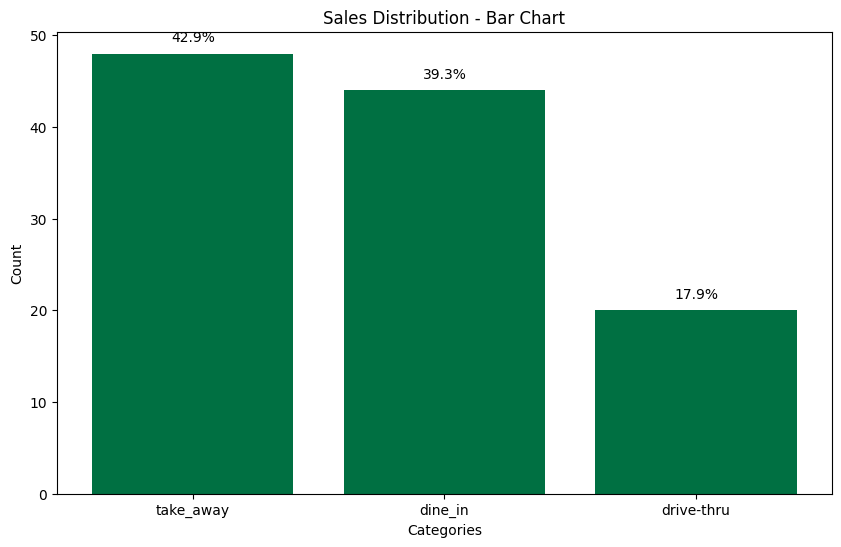

In [29]:
filtered_data = {
    'take_away': 48,
    'dine_in': 44,
    'drive-thru': 20
}

labels = list(filtered_data.keys())
values = list(filtered_data.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='#007042')

filtered_total_count = sum(values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{(yval / filtered_total_count * 100):.1f}%', 
             ha='center', va='bottom')

plt.title('Sales Distribution - Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


## Time Spent 

In [30]:
df['time_spent'].value_counts()

time_spent
below_30_minutes                64
between_30_minutes_to_1_hour    34
between_1_hour_to_2_hours       12
more_than_3_hours                2
between_2_hours_to_3_hours       1
Name: count, dtype: int64

In [31]:
percentage_counts = df['time_spent'].value_counts(normalize=True) * 100
print(percentage_counts)

time_spent
below_30_minutes                56.637168
between_30_minutes_to_1_hour    30.088496
between_1_hour_to_2_hours       10.619469
more_than_3_hours                1.769912
between_2_hours_to_3_hours       0.884956
Name: proportion, dtype: float64


## Member and returning

In [32]:
df['member'].value_counts()

member
yes    60
no     53
Name: count, dtype: int64

In [33]:
member_percentage = df['member'].value_counts(normalize=True) * 100
print(member_percentage)

member
yes    53.097345
no     46.902655
Name: proportion, dtype: float64


In [34]:
df['will_return'].value_counts()

will_return
yes    90
no     23
Name: count, dtype: int64

In [35]:
return_percentage = df['will_return'].value_counts(normalize=True) * 100
print(return_percentage)

will_return
yes    79.646018
no     20.353982
Name: proportion, dtype: float64


In [36]:
filtered_yes_df = df[(df['member'] == 'yes') & (df['will_return'] == 'yes')]

percentage_yes_member_and_will_return = (len(filtered_yes_df) / len(df)) * 100

percentage_yes_member_and_will_return

48.67256637168141

## Distance

In [37]:
unique_distances = df['distance'].unique()
print(unique_distances)

['within_1km' '1km_-_3km' 'more_than_3km']


In [38]:
unique_distances = df['distance'].count()
print(unique_distances)

113


In [39]:
unique_distances = df['distance'].unique()

distance_counts = df['distance'].value_counts()

print(distance_counts)

distance
more_than_3km    56
1km_-_3km        32
within_1km       25
Name: count, dtype: int64


## Promotions Source

In [40]:
df['promotions_source'].value_counts()

promotions_source
social_media                                                                                                                                   28
social_media;through_friends_and_word_of_mouth                                                                                                 14
starbucks_website/apps;social_media                                                                                                             9
through_friends_and_word_of_mouth                                                                                                               7
in_store_displays                                                                                                                               7
starbucks_website/apps                                                                                                                          6
starbucks_website/apps;social_media;emails;through_friends_and_word_of_mouth                              

In [41]:
def promotions_source_data(data, category_mapping):
    aggregated_data = defaultdict(int)
    for purchase, count in data.items():
        categories = purchase.split(';')
        for category in categories:
            category = category.strip('_')

            mapped_category = category_mapping.get(category, category)
            aggregated_data[mapped_category] += count
    return aggregated_data

promotions_source_counts = df['promotions_source'].value_counts().to_dict()

promotions_mapping = {
    "social_media": "social_media",
    "through_friends_and_word_of_mouth": "through_friends_and_word_of_mouth",
    "in_store_displays": "in_store_displays ",
    "starbucks_website/apps": "website/apps",
    "emails": "others",
    "billboards": "others",
    "deal_sites_(fave,_iprice,_etc...)": "others",
    "application_offer" : "others",
}

promotions_data = promotions_source_data(promotions_source_counts, promotions_mapping)
print(promotions_data)


defaultdict(<class 'int'>, {'social_media': 85, 'through_friends_and_word_of_mouth': 46, 'website/apps': 34, 'in_store_displays ': 21, 'others': 36})


In [42]:
total_promotions = sum(promotions_data.values())

percentages = {category: (count / total_promotions) * 100 for category, count in promotions_data.items()}

print(percentages)


{'social_media': 38.288288288288285, 'through_friends_and_word_of_mouth': 20.72072072072072, 'website/apps': 15.315315315315313, 'in_store_displays ': 9.45945945945946, 'others': 16.216216216216218}


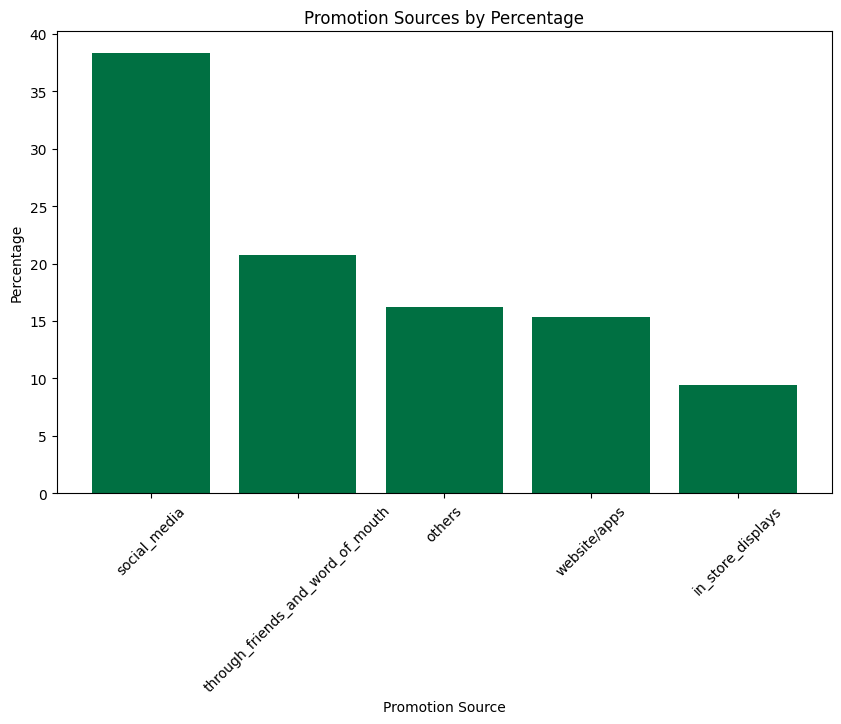

In [43]:
percentages = {
    'social_media': 38.288288288288285,
    'through_friends_and_word_of_mouth': 20.72072072072072,
    'website/apps': 15.315315315315313,
    'in_store_displays': 9.45945945945946,
    'others': 16.216216216216218
}

sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_percentages.keys(), sorted_percentages.values(), color='#007042')
plt.xlabel('Promotion Source')
plt.ylabel('Percentage')
plt.title('Promotion Sources by Percentage')
plt.xticks(rotation=45) 
plt.show()


## price rating by visit frequency

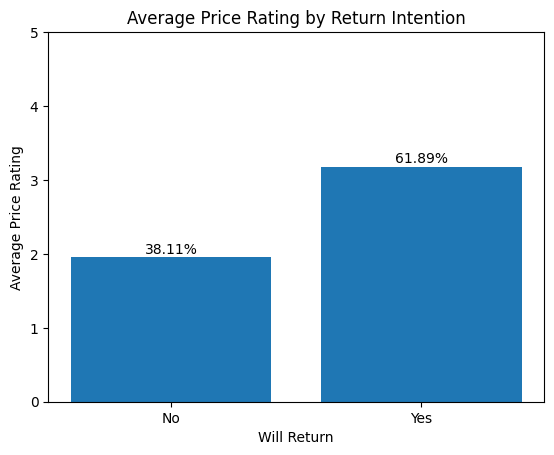

In [44]:
df['price_rating'] = pd.to_numeric(df['price_rating'], errors='coerce')

price_rating_means = df.groupby('will_return')['price_rating'].mean()

total_count = price_rating_means.sum()

percentages = (price_rating_means / total_count) * 100

plt.bar(price_rating_means.index, price_rating_means.values)
plt.title('Average Price Rating by Return Intention')
plt.xlabel('Will Return')
plt.ylabel('Average Price Rating')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylim(0, 5)

for i, percentage in enumerate(percentages):
    plt.text(i, price_rating_means.values[i] + 0.05, f"{percentage:.2f}%", ha='center')

plt.show()


## occupation

In [45]:
occupation_count = df['occupation'].count()
print(occupation_count)

113


In [46]:
occupation_count = df['occupation'].unique()

occupation_count = df['occupation'].value_counts()

print(occupation_count)

occupation
employed         58
student          37
self-employed    16
housewife         2
Name: count, dtype: int64


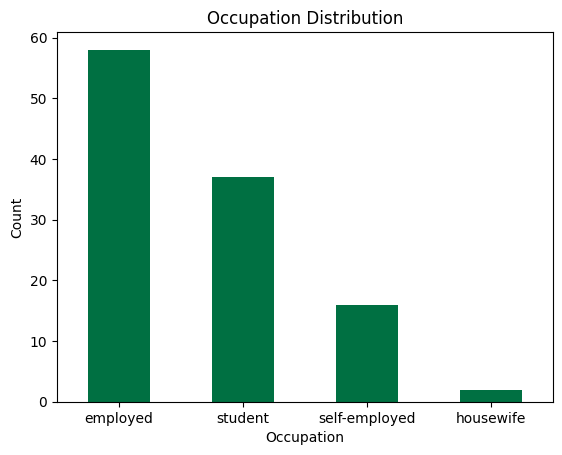

In [47]:
occupation_count = df.groupby('occupation').size()

occupation_count_sorted = occupation_count.sort_values(ascending=False)

occupation_count_sorted.plot(kind='bar', color='#007042')

plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0) 

plt.show()


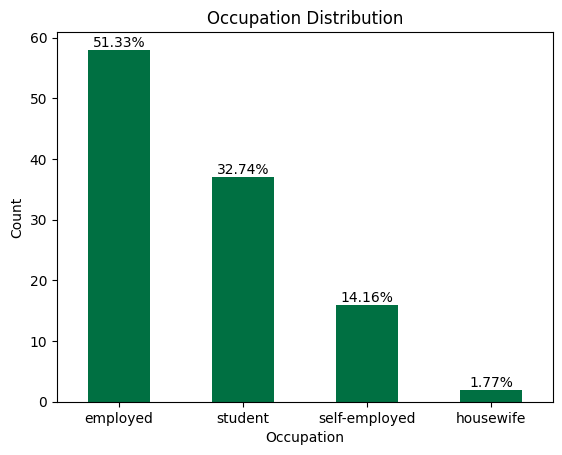

In [48]:
occupation_count = df.groupby('occupation').size()

occupation_count_sorted = occupation_count.sort_values(ascending=False)


total = occupation_count_sorted.sum()

occupation_count_sorted.plot(kind='bar', color='#007042')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0) 


for index, value in enumerate(occupation_count_sorted):
    percentage = f"{(value / total) * 100:.2f}%"
    plt.text(index, value, percentage, ha='center', va='bottom')

plt.show()


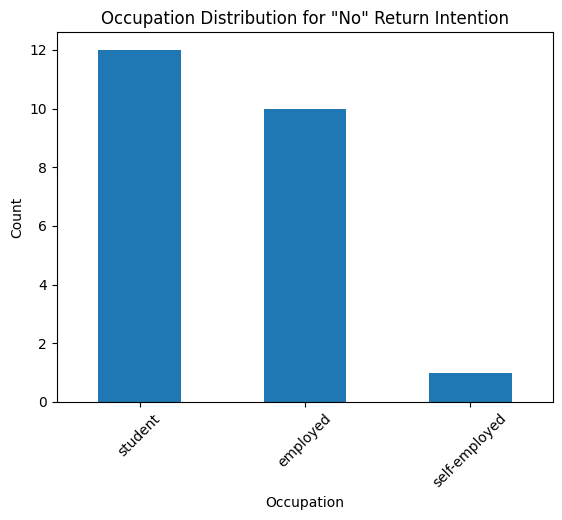

In [49]:
no_return_df = df[df['will_return'] == 'no']

if not no_return_df.empty:
    occupation_counts_no_return = no_return_df['occupation'].value_counts()

    occupation_counts_no_return.plot(kind='bar')
    plt.title('Occupation Distribution for "No" Return Intention')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("There are no data points with 'No' return intention.")


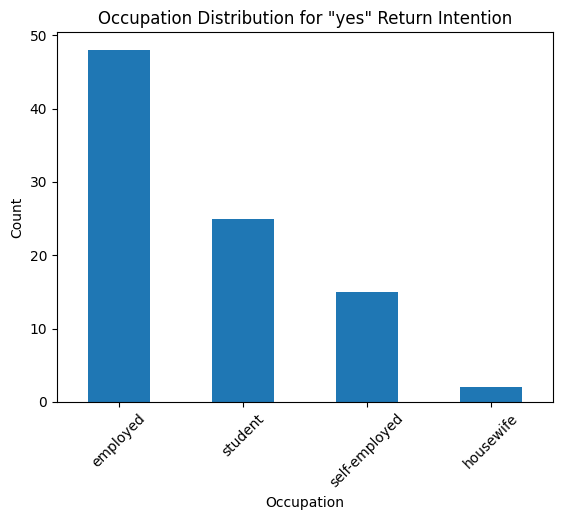

In [50]:
no_return_df = df[df['will_return'] == 'yes']

if not no_return_df.empty:
    occupation_counts_no_return = no_return_df['occupation'].value_counts()

    occupation_counts_no_return.plot(kind='bar')
    plt.title('Occupation Distribution for "yes" Return Intention')
    plt.xlabel('Occupation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("There are no data points with 'yes' return intention.")
